In [355]:
import pandas as pd

final_data_full = pd.read_csv('../data/curated/final_data_full.csv')
past_data_cleaned = pd.read_csv('../data/curated/pased_data_clean.csv')

In [356]:
final_data_full.head()

,price,bedrooms,bathrooms,parking,addressLocality,property_type,school_count,age_distribution,hosipital_count,park_count,...,Crime_Count_2019,Crime_Rate_2019,Crime_Count_2018,Crime_Rate_2018,Crime_Count_2017,Crime_Rate_2017,Crime_Count_2016,Crime_Rate_2016,Crime_Count_2015,Crime_Rate_2015
0,300.0,-2.317883,-0.72078,-1.150262,Shepparton,Apartment,-0.042192,balanced age,0.205552,3.073023,...,-0.618716,0.480325,-0.671218,0.246285,-0.710405,0.202438,-0.750159,0.093329,-0.705153,0.053718
1,250.0,-2.317883,-0.72078,-1.150262,Brunswick,Apartment,-0.468513,20 - 39,-0.349124,-0.373192,...,-0.137802,0.616927,-0.132154,0.571024,-0.167988,0.495513,-0.153534,0.477740,-0.091318,0.495566
2,230.0,-2.317883,-0.72078,-1.150262,Prahran,Apartment,0.810450,20 - 39,0.760228,-0.373192,...,-0.452127,-0.252947,-0.460971,-0.298320,-0.399334,-0.213290,-0.493126,-0.361499,-0.412931,-0.278035
3,330.0,-2.317883,-0.72078,-1.150262,Collingwood,Apartment,1.236771,20 - 39,-0.903800,-0.373192,...,-0.137802,0.616927,-0.132154,0.571024,-0.167988,0.495513,-0.153534,0.477740,-0.091318,0.495566
4,460.0,-2.317883,-0.72078,-0.120276,Docklands,Apartment,-1.321155,20 - 39,-0.903800,-0.373192,...,2.223846,1.938920,2.234958,2.012520,2.227533,2.033276,2.220603,2.074261,2.241100,2.079519


In [357]:
past_data_cleaned.head()

,Suburb,Year,Property Type,Count,Total_Price,Median
0,Albert Park-Middle Park-West St Kilda,2000,flat,700.0,152126.0,217.322857
1,Albert Park-Middle Park-West St Kilda,2000,house,274.0,98998.0,361.306569
2,Albert Park-Middle Park-West St Kilda,2000,Other properties,731.0,239321.0,327.388509
3,Albert Park-Middle Park-West St Kilda,2001,flat,768.0,183210.0,238.554688
4,Albert Park-Middle Park-West St Kilda,2001,house,311.0,123771.0,397.977492


In [358]:
final_data_filtered = final_data_full[['price', 'addressLocality']]
final_data_filtered

,price,addressLocality
0,300.0,Shepparton
1,250.0,Brunswick
2,230.0,Prahran
3,330.0,Collingwood
4,460.0,Docklands
...,...,...
7745,950.0,Bulleen
7746,895.0,Seaford
7747,990.0,Doncaster East
7748,1150.0,Ivanhoe


In [359]:
final_data_grouped = final_data_filtered.groupby('addressLocality')['price'].sum().reset_index()
final_data_grouped


,addressLocality,price
0,Abbotsford,36750.0
1,Albert Park,10765.0
2,Alfredton,17375.0
3,Alphington,15890.0
4,Altona,18200.0
...,...,...
181,Whittlesea,2970.0
182,Williamstown,26125.0
183,Windsor,23837.0
184,Wodonga,17300.0


In [360]:
final_data_grouped = final_data_grouped.rename(columns={'addressLocality': 'Suburb'})
final_data_grouped

,Suburb,price
0,Abbotsford,36750.0
1,Albert Park,10765.0
2,Alfredton,17375.0
3,Alphington,15890.0
4,Altona,18200.0
...,...,...
181,Whittlesea,2970.0
182,Williamstown,26125.0
183,Windsor,23837.0
184,Wodonga,17300.0


In [361]:
import pandas as pd

# 创建一个列表来存储合并后的结果
merged_data_list = []

# 遍历 past_data_cleaned 中的每个 suburb
for idx, row in past_data_cleaned.iterrows():
    suburb_combined = row['Suburb'] 
    # properties_type = row['Property Type']  # 获取对应的属性类型
    
    # 拆分 suburb，获取每个单独的区域
    suburbs = suburb_combined.split('-')
    
    matching_suburbs = final_data_grouped[
        final_data_grouped['Suburb'].isin(suburbs) 
       # &(final_data_filtered['Property Type'] == properties_type)
    ]
    
    # 计算 total price (所有匹配的 suburb 的 price 总和)
    total_price = matching_suburbs['price'].sum()
    
    # 计算 suburb_count (所有匹配的 suburb 的记录数量之和)
    suburb_count = matching_suburbs.shape[0]
    
    # 将结果添加到列表中
    merged_data_list.append({
        'Suburb': suburb_combined,
        'Total_Price': total_price,
        'Count': suburb_count
        #'Property Type': properties_type
    })

merged_data = pd.DataFrame(merged_data_list)
merged_data = merged_data.drop_duplicates(subset=['Suburb'])
#merged_data = merged_data.drop_duplicates(subset=['Suburb', 'Property Type'])

In [362]:
merged_data

,Suburb,Total_Price,Count
0,Albert Park-Middle Park-West St Kilda,10765.0,1
72,Altona,18200.0,1
144,Armadale,27005.0,1
216,Aspendale-Chelsea-Carrum,15855.0,3
288,Bairnsdale,5730.0,1
...,...,...,...
10152,Whittlesea,2970.0,1
10224,Williamstown,26125.0,1
10296,Wodonga,17300.0,1
10368,Yarra Ranges,0.0,0


In [363]:
merged_data['Median'] = merged_data['Total_Price'] / merged_data['Count']
merged_data.fillna(0, inplace=True)
merged_data['Year'] = 2024
merged_data
#merged_data.to_csv('2024_data.csv', index=False)

,Suburb,Total_Price,Count,Median,Year
0,Albert Park-Middle Park-West St Kilda,10765.0,1,10765.0,2024
72,Altona,18200.0,1,18200.0,2024
144,Armadale,27005.0,1,27005.0,2024
216,Aspendale-Chelsea-Carrum,15855.0,3,5285.0,2024
288,Bairnsdale,5730.0,1,5730.0,2024
...,...,...,...,...,...
10152,Whittlesea,2970.0,1,2970.0,2024
10224,Williamstown,26125.0,1,26125.0,2024
10296,Wodonga,17300.0,1,17300.0,2024
10368,Yarra Ranges,0.0,0,0.0,2024


In [364]:
past_grouped_data = past_data_cleaned.groupby(['Suburb', 'Year'])

result = past_grouped_data.agg(
    Total_Price=('Total_Price', 'sum'),    
    Count=('Count', 'sum')
).reset_index()


In [365]:
result['Median'] = result['Total_Price'] / result['Count']

In [366]:
result

,Suburb,Year,Total_Price,Count,Median
0,Albert Park-Middle Park-West St Kilda,2000,490445.0,1705.0,287.651026
1,Albert Park-Middle Park-West St Kilda,2001,557967.0,1881.0,296.633174
2,Albert Park-Middle Park-West St Kilda,2002,552505.0,1813.0,304.746277
3,Albert Park-Middle Park-West St Kilda,2003,990035.0,3341.0,296.328943
4,Albert Park-Middle Park-West St Kilda,2004,613574.0,1986.0,308.949648
...,...,...,...,...,...
3499,Yarraville-Seddon,2019,852445.0,1625.0,524.581538
3500,Yarraville-Seddon,2020,893157.0,1712.0,521.703855
3501,Yarraville-Seddon,2021,865193.0,1729.0,500.400810
3502,Yarraville-Seddon,2022,898833.0,1827.0,491.972085


## Model

In [367]:
result['Growth_Rate'] = result['Median'].pct_change().dropna()

data = result.dropna(subset=['Growth_Rate'])

/var/folders/_j/twr8x6q52wn1cwysdlwr0lbc0000gn/T/ipykernel_33651/3479212115.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  result['Growth_Rate'] = result['Median'].pct_change().dropna()


In [368]:
data
#data.to_csv('training_data.csv', index=False)

,Suburb,Year,Total_Price,Count,Median,Growth_Rate
1,Albert Park-Middle Park-West St Kilda,2001,557967.0,1881.0,296.633174,0.031226
2,Albert Park-Middle Park-West St Kilda,2002,552505.0,1813.0,304.746277,0.027351
3,Albert Park-Middle Park-West St Kilda,2003,990035.0,3341.0,296.328943,-0.027621
4,Albert Park-Middle Park-West St Kilda,2004,613574.0,1986.0,308.949648,0.042590
5,Albert Park-Middle Park-West St Kilda,2005,599878.0,1964.0,305.436864,-0.011370
...,...,...,...,...,...,...
3499,Yarraville-Seddon,2019,852445.0,1625.0,524.581538,0.082634
3500,Yarraville-Seddon,2020,893157.0,1712.0,521.703855,-0.005486
3501,Yarraville-Seddon,2021,865193.0,1729.0,500.400810,-0.040834
3502,Yarraville-Seddon,2022,898833.0,1827.0,491.972085,-0.016844


In [369]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [370]:
# 将数据集拆分为特征和标签
X = data[['Suburb', 'Year', 'Total_Price', 'Count', 'Median']]
y = data['Growth_Rate']

# 将 Suburb 转换为数值编码或独热编码
X = pd.get_dummies(X, columns=['Suburb'], drop_first=True)

# 按照7:3比例拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [371]:
# 使用随机森林回归模型
model = RandomForestRegressor(random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 评估模型的性能，计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")


Mean Squared Error on Test Set: 0.004595314698836297


In [372]:
# 对 merged_data 进行相同的特征处理（编码 Suburb）
merged_data_encoded = pd.get_dummies(merged_data[['Suburb', 'Total_Price', 'Count', 'Median', 'Year']], columns=['Suburb'], drop_first=True)

# 确保列顺序与训练集一致
merged_data_encoded = merged_data_encoded.reindex(columns=X.columns, fill_value=0)

# 使用训练好的模型进行预测
merged_data['Predicted_Growth_Rate'] = model.predict(merged_data_encoded)

# 按照预测的增长率排序，找出前10个增长率最高的区
data_suburbs = merged_data[['Suburb', 'Predicted_Growth_Rate']].sort_values(by='Predicted_Growth_Rate', ascending=False)

data_suburbs


,Suburb,Predicted_Growth_Rate
4968,Hawthorn,0.308933
3384,East Melbourne,0.235999
1800,Canterbury-Surrey Hills-Mont Albert,0.218101
5472,Kew,0.215742
3024,Docklands,0.203968
...,...,...
10080,West Footscray,0.029489
10368,Yarra Ranges,0.029489
3456,East St Kilda,0.029489
360,Ballarat,0.028421


In [373]:
top_10_suburbs = merged_data[['Suburb', 'Predicted_Growth_Rate']].sort_values(by='Predicted_Growth_Rate', ascending=False).head(10)

top_10_suburbs

,Suburb,Predicted_Growth_Rate
4968,Hawthorn,0.308933
3384,East Melbourne,0.235999
1800,Canterbury-Surrey Hills-Mont Albert,0.218101
5472,Kew,0.215742
3024,Docklands,0.203968
9288,Toorak,0.203622
9216,Thornbury,0.183031
4824,Hampton-Beaumaris,0.172137
5688,Malvern East,0.171674
1152,Brighton,0.168543


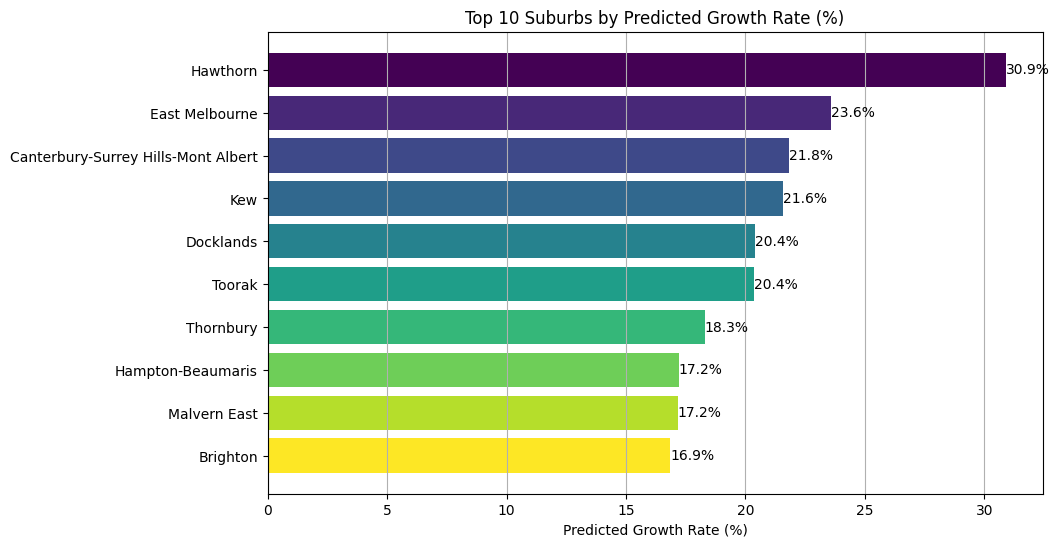

In [374]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert growth rates to percentages
top_10_suburbs['Predicted_Growth_Rate'] = top_10_suburbs['Predicted_Growth_Rate'] * 100

# Create the figure
plt.figure(figsize=(10, 6))

# Generate colors using the Viridis colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_suburbs)))

# Create a horizontal bar chart
plt.barh(top_10_suburbs['Suburb'], top_10_suburbs['Predicted_Growth_Rate'], color=colors)
plt.xlabel('Predicted Growth Rate (%)')  # Update x-axis label
plt.title('Top 10 Suburbs by Predicted Growth Rate (%)')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.grid(axis='x')

# Add percentage text on each bar
for index, value in enumerate(top_10_suburbs['Predicted_Growth_Rate']):
    plt.text(value, index, f'{value:.1f}%', va='center')  

# Save the plot before showing
plt.savefig('top_10_suburbs_growth_rate.png', format='png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


In [375]:
import pandas as pd

# Step 1: 创建一个空的列表用于存放扩展后的行
expanded_rows= []

for idx, row in top_10_suburbs.iterrows():
    suburbs = row['Suburb'].split('-')  # 通过 '-' 将 Suburb 列分割成多个区
    
    # 为每个区创建一个新行
    for suburb in suburbs:
        expanded_rows.append({
            'Suburb': suburb.strip(),  # 去除前后空格
            'Predicted_Growth_Rate': row['Predicted_Growth_Rate']
        })

# Step 2: 用扩展后的行创建一个新的 DataFrame
data_growth = pd.DataFrame(expanded_rows)

data_growth


,Suburb,Predicted_Growth_Rate
0,Hawthorn,30.893278
1,East Melbourne,23.599917
2,Canterbury,21.810123
3,Surrey Hills,21.810123
4,Mont Albert,21.810123
5,Kew,21.574166
6,Docklands,20.396847
7,Toorak,20.362239
8,Thornbury,18.303075
9,Hampton,17.213716


## Map

In [376]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [377]:
gmu_data = gpd.read_file('../data/landing/POSTCODE_POLYGON.shp') 

In [378]:
gmu_data.columns = gmu_data.columns.str.lower()
gmu_data

,ufi,pfi,postcode,task_id,pfi_cr,ufi_old,ufi_cr,label_use_,geometry
0,842441976,205407826,3688,NaN,2005-09-27,817075044,2024-04-22,4,"POLYGON ((2652345.839 2605381.033, 2652346.26 ..."
1,468437819,205407471,3597,NaN,2005-09-27,314164011,2013-10-24,3,"MULTIPOLYGON (((2316653.529 2744651.543, 23163..."
2,853633320,205410105,3084,NaN,2005-09-27,706500672,2024-07-10,5,"POLYGON ((2504773.339 2415947.903, 2504910.665..."
3,853751869,205407784,3764,NaN,2005-09-27,839445966,2024-07-11,3,"POLYGON ((2491486.042 2494733.124, 2491608.999..."
4,853712385,205410055,3215,NaN,2005-09-27,816137233,2024-07-11,5,"POLYGON ((2443088.41 2374149.697, 2443028.258 ..."
...,...,...,...,...,...,...,...,...,...
689,812374236,205409002,3954,NaN,2005-09-27,539206910,2023-11-20,5,"POLYGON ((2585105.752 2325293.297, 2585103.665..."
690,812633214,205407604,3315,NaN,2005-09-27,795436832,2023-11-24,3,"POLYGON ((2197235.076 2447284.597, 2197234.106..."
691,812374218,205408450,3824,NaN,2005-09-27,808851560,2023-11-20,4,"POLYGON ((2611633.48 2354311.967, 2611438.258 ..."
692,832994431,205407533,3874,NaN,2005-09-27,468438467,2024-02-26,3,"POLYGON ((2679718.313 2333605.531, 2679713.872..."


In [379]:
gmu_data = gmu_data[['postcode','geometry']]
gmu_data

,postcode,geometry
0,3688,"POLYGON ((2652345.839 2605381.033, 2652346.26 ..."
1,3597,"MULTIPOLYGON (((2316653.529 2744651.543, 23163..."
2,3084,"POLYGON ((2504773.339 2415947.903, 2504910.665..."
3,3764,"POLYGON ((2491486.042 2494733.124, 2491608.999..."
4,3215,"POLYGON ((2443088.41 2374149.697, 2443028.258 ..."
...,...,...
689,3954,"POLYGON ((2585105.752 2325293.297, 2585103.665..."
690,3315,"POLYGON ((2197235.076 2447284.597, 2197234.106..."
691,3824,"POLYGON ((2611633.48 2354311.967, 2611438.258 ..."
692,3874,"POLYGON ((2679718.313 2333605.531, 2679713.872..."


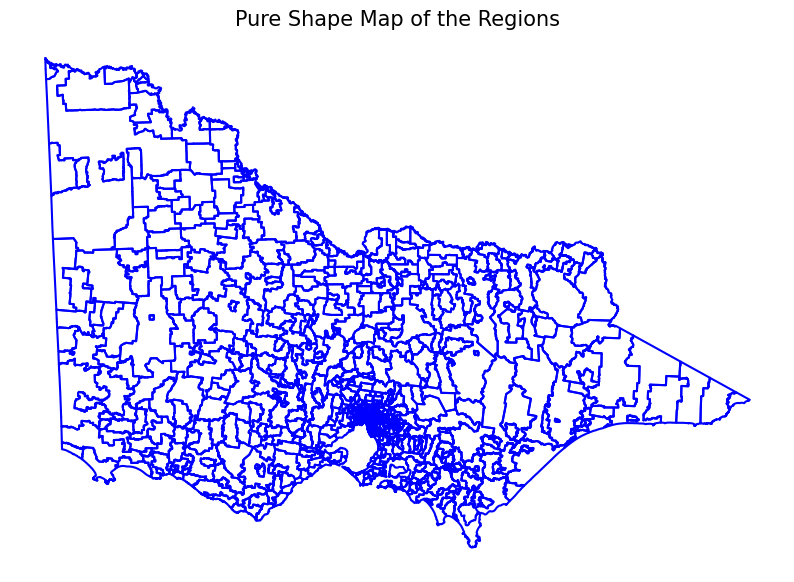

In [380]:
# 创建一个图形
fig, ax = plt.subplots(figsize=(10, 10))

# 绘制纯形状图
gmu_data.boundary.plot(ax=ax, color='blue')  # 仅绘制边界

# 设置标题和主题
ax.set_title('Pure Shape Map of the Regions', fontsize=15)
ax.set_axis_off()  # 隐藏坐标轴

# 显示地图
plt.show()


In [381]:
geo_suburbs= pd.read_csv('../data/landing/australian_postcodes.csv')

In [382]:
geo_suburbs

,id,postcode,locality,state,long,lat,dc,type,status,sa3,...,altitude,chargezone,phn_code,phn_name,lgaregion,lgacode,electorate,electoraterating,sed_code,sed_name
0,230,200,ANU,ACT,149.119000,-35.277700,NaN,NaN,Updated 3-Dec-2022,NaN,...,NaN,N2,NaN,NaN,Unincorporated ACT,89399.0,Durack,NaN,NaN,NaN
1,21820,200,Australian National University,ACT,149.118900,-35.277700,NaN,NaN,Updated 3-Dec-2022,NaN,...,NaN,N2,NaN,NaN,Unincorporated ACT,89399.0,Durack,NaN,NaN,NaN
2,232,800,DARWIN,NT,130.836680,-12.458684,NaN,NaN,Updated 3-Dec-2022,70101.0,...,NaN,NT1,PHN701,Northern Territory,Darwin Waterfront Precinct,71150.0,Solomon,Inner Metropolitan,70022.0,Port Darwin
3,24049,800,DARWIN CITY,NT,130.836680,-12.458684,NaN,NaN,Updated 3-Dec-2022,70101.0,...,NaN,NT1,PHN701,Northern Territory,Darwin Waterfront Precinct,71150.0,Solomon,Inner Metropolitan,70022.0,Port Darwin
4,233,801,DARWIN,NT,130.836680,-12.458684,NaN,NaN,Updated 3-Dec-2022,70101.0,...,NaN,NT1,PHN701,NaN,Darwin,71000.0,Lingiari,Rural,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18540,11186,9013,BRISBANE,QLD,152.823141,-27.603479,CITY DC - BRISBANE,LVR,Updated 25-Mar-2020 SA3,30504.0,...,44.349792,Q1,PHN301,NaN,Brisbane,31000.0,Griffith,NaN,NaN,NaN
18541,11187,9015,BRISBANE,QLD,152.823141,-27.603479,CITY DC - BRISBANE,LVR,Updated 25-Mar-2020 SA3,30504.0,...,44.349792,Q1,PHN301,NaN,Brisbane,31000.0,Griffith,NaN,NaN,NaN
18542,11196,9464,NORTHGATE MC,QLD,153.074982,-27.397055,NaN,NaN,Updated 25-Mar-2020 SA3,30203.0,...,NaN,Q1,PHN301,NaN,Brisbane,31000.0,Griffith,NaN,NaN,NaN
18543,11197,9726,GOLD COAST MC,QLD,153.412197,-28.008783,NaN,NaN,Updated 25-Mar-2020 SA3,30910.0,...,NaN,Q1,PHN303,NaN,Gold Coast,33430.0,McPherson,NaN,NaN,NaN


In [383]:
columns_to_keep = ['postcode', 'locality', 'state', 'long', 'lat']
geo_filtered = geo_suburbs[columns_to_keep]
geo_filtered = geo_filtered [geo_filtered ['state'] == 'VIC']
geo_filtered 

,postcode,locality,state,long,lat
6202,3000,MELBOURNE,VIC,144.982585,-37.814437
6203,3001,MELBOURNE,VIC,144.982585,-37.814437
6204,3002,EAST MELBOURNE,VIC,144.982585,-37.814437
6205,3003,WEST MELBOURNE,VIC,144.949592,-37.810871
6206,3004,MELBOURNE,VIC,144.982585,-37.814437
...,...,...,...,...,...
18529,8438,SUNSHINE WEST,VIC,144.811079,-37.798099
18530,8511,SUNSHINE WEST,VIC,144.811079,-37.798099
18531,8785,DANDENONG,VIC,145.208504,-38.016114
18532,8785,DANDENONG SOUTH,VIC,145.208504,-38.016114


In [384]:
geo_filtered .rename(columns={'locality': 'Suburb'}, inplace=True)
geo_filtered ['Suburb'] = geo_filtered ['Suburb'].str.title()
geo_filtered 

,postcode,Suburb,state,long,lat
6202,3000,Melbourne,VIC,144.982585,-37.814437
6203,3001,Melbourne,VIC,144.982585,-37.814437
6204,3002,East Melbourne,VIC,144.982585,-37.814437
6205,3003,West Melbourne,VIC,144.949592,-37.810871
6206,3004,Melbourne,VIC,144.982585,-37.814437
...,...,...,...,...,...
18529,8438,Sunshine West,VIC,144.811079,-37.798099
18530,8511,Sunshine West,VIC,144.811079,-37.798099
18531,8785,Dandenong,VIC,145.208504,-38.016114
18532,8785,Dandenong South,VIC,145.208504,-38.016114


In [385]:
# 合并同一个 suburb 的 postcode
geo_filtered['postcode'] = geo_filtered['postcode'].astype(str)  # 确保 postcode 是字符串类型
merged_postcodes = geo_filtered.groupby('Suburb')['postcode'].agg(', '.join).reset_index()
geo_filtered = geo_filtered.drop(columns='postcode')  # 删除原始 postcode 列
geo_filtered = geo_filtered.merge(merged_postcodes, on='Suburb')
geo_filtered = geo_filtered.drop_duplicates()
geo_filtered

,Suburb,state,long,lat,postcode
0,Melbourne,VIC,144.982585,-37.814437,"3000, 3001, 3004, 8001, 8045, 8051, 8066, 8069..."
2,East Melbourne,VIC,144.982585,-37.814437,"3002, 8002"
3,West Melbourne,VIC,144.949592,-37.810871,3003
5,St Kilda Road Central,VIC,144.970161,-37.844246,"3004, 8008"
6,St Kilda Road Melbourne,VIC,144.976000,-37.836800,3004
...,...,...,...,...,...
3518,Collins Street West,VIC,144.957000,-37.818300,8007
3520,Flinders Lane,VIC,144.964531,-37.817201,8009
3521,Law Courts,VIC,146.293728,-38.185857,8010
3522,Little Lonsdale Street,VIC,144.961746,-37.811314,8011


In [386]:
geo_data = geo_filtered.merge(data_growth, on='Suburb', how='left')
geo_data

,Suburb,state,long,lat,postcode,Predicted_Growth_Rate
0,Melbourne,VIC,144.982585,-37.814437,"3000, 3001, 3004, 8001, 8045, 8051, 8066, 8069...",NaN
1,East Melbourne,VIC,144.982585,-37.814437,"3002, 8002",23.599917
2,West Melbourne,VIC,144.949592,-37.810871,3003,NaN
3,St Kilda Road Central,VIC,144.970161,-37.844246,"3004, 8008",NaN
4,St Kilda Road Melbourne,VIC,144.976000,-37.836800,3004,NaN
...,...,...,...,...,...,...
3484,Collins Street West,VIC,144.957000,-37.818300,8007,NaN
3485,Flinders Lane,VIC,144.964531,-37.817201,8009,NaN
3486,Law Courts,VIC,146.293728,-38.185857,8010,NaN
3487,Little Lonsdale Street,VIC,144.961746,-37.811314,8011,NaN


In [387]:
geo_data['postcode'] = geo_data['postcode'].str.split(', ')
geo_data = geo_data.explode('postcode')

In [388]:
geo_data

,Suburb,state,long,lat,postcode,Predicted_Growth_Rate
0,Melbourne,VIC,144.982585,-37.814437,3000,NaN
0,Melbourne,VIC,144.982585,-37.814437,3001,NaN
0,Melbourne,VIC,144.982585,-37.814437,3004,NaN
0,Melbourne,VIC,144.982585,-37.814437,8001,NaN
0,Melbourne,VIC,144.982585,-37.814437,8045,NaN
...,...,...,...,...,...,...
3484,Collins Street West,VIC,144.957000,-37.818300,8007,NaN
3485,Flinders Lane,VIC,144.964531,-37.817201,8009,NaN
3486,Law Courts,VIC,146.293728,-38.185857,8010,NaN
3487,Little Lonsdale Street,VIC,144.961746,-37.811314,8011,NaN


In [389]:
import pandas as pd
import folium
import geopandas as gpd
import numpy as np
import branca  # Ensure you have branca imported

# Assuming gmu_data and geo_data are already defined and imported

# 合并数据
df= gmu_data.merge(geo_data, on='postcode')

# 过滤出有效的 Predicted_Growth_Rate
df = df[df['Predicted_Growth_Rate'].notna()]

# 创建 Folium 地图
m = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=12)

import branca

# 创建一个颜色映射，适应百分比增长率，专注于0到50%之间
colormap = branca.colormap.StepColormap(
    colors=[
        '#ff0000',  # 0% - 红色
        '#ff6f61',  # 5% - 鲜艳的橙色
        '#ffcccb',  # 10% - 浅红色
        '#ff8a80',  # 15% - 中等红色
        '#ffb74d',  # 20% - 鲜艳的黄色
        '#ffe57f',  # 25% - 明亮的黄色
        '#c6ff00',  # 30% - 浅绿色
        '#76ff03',  # 35% - 鲜艳的绿色
        '#64dd17',  # 40% - 深绿色
        '#00e676',  # 45% - 蓝绿色
        '#00796b'   # 50% - 深蓝绿色
    ],
    vmin=0,  # 最小值调整为0%
    vmax=50,  # 最大值调整为50%
    index=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],  # 使用每5%的索引
    caption='Predicted Growth Rate (%)'  # 更新图例标题
)


# 添加前10个增长率区域的边界
folium.GeoJson(
    df,
    name='Top Predicted Growth Rate Areas',
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['Predicted_Growth_Rate']),
        'color': '#000000',
        'weight': 1,
        'fillOpacity': 0.6,
    }
).add_to(m)



# 添加 gmu_data 的边界
folium.GeoJson(
    gmu_data.geometry,  # 使用 gmu_data 的几何信息
    style_function=lambda x: {
        'color': 'green',
        'weight': 2,
        'fillOpacity': 0
    },
    name='GMU Data Boundaries'  # 可选：为图层命名
).add_to(m)

# 添加图例
m.add_child(colormap)

# 添加图层控制
folium.LayerControl().add_to(m)



In [390]:
m.save('../plot/predicted_growth_rate_map.html')